In [ ]:
# pytube github (https://github.com/pytube/pytube)
# 需先安裝函示庫 pytube
# pip install pytube

In [1]:
# import
from pytube import YouTube
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# 下載影片

yt = YouTube("https://www.youtube.com/watch?v=X_NbGmbqnIc&t=145s")
# 需更換網址

yt.streams.filter().get_highest_resolution().download(filename="hololive_0.mp4")
# 時間取決於影片畫質&長度         (通常會下載到1080P, filename 自己定義影片的名稱)

# yt.streams.filter().get_by_resolution('720p').download(filename='')
# # 如檔案太大，可以下載720p就好    (需要跟AI同學商量圖片大小)

In [ ]:
# # 在IDE上撥放影片

# import IPython.display as ipd
# ipd.Video("First_time_dl.mp4")

In [2]:
# 載入影片

imgs = cv2.VideoCapture("hololive_test.mp4")

In [3]:
# 檢查影片一共有幾幀

imgs.get(cv2.CAP_PROP_FRAME_COUNT)

25127.0

In [4]:
# 檢查每幀寬高

height = imgs.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = imgs.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f"圖片寬:{width},高:{height}")

圖片寬:1920.0,高:1080.0


In [5]:
# 檢查影片FPS

imgs.get(cv2.CAP_PROP_FPS)

29.827672327672328

In [7]:
# 檢查圖片

ret, img = imgs.read()
print(f"是否捕捉到圖片: {ret}")
# print(f"圖片資訊\n{img}")

是否捕捉到圖片: True


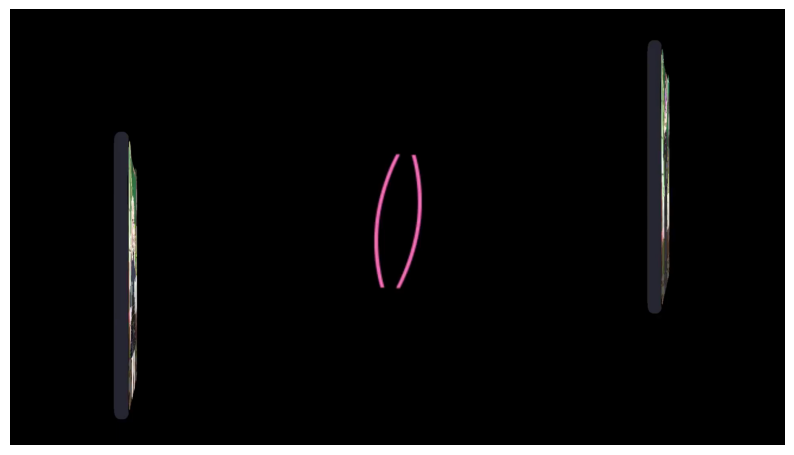

In [8]:
# 檢查是否讀取到影片每一幀圖片

def display_cv2_img(img, figsize=(10,10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

# plt.imshow(img)
# matplot 讀取圖片的color channel 與 cv2 不同，所以利用上方function 轉變color channel

display_cv2_img(img)

In [ ]:
# # 每4000幀 顯示一次 (顯示 4000, 8000, 12000 ....)   用於大致檢查Vtuber影片中有無大作動的位移
# # 此cell 須執行較久時間

# fig, axs = plt.subplots(4, 8, figsize=(30, 20))
# axs = axs.flatten()

# imgs = cv2.VideoCapture("First_time_dl.mp4")
# n_frames = int(imgs.get(cv2.CAP_PROP_FRAME_COUNT))

# img_idx = 0
# for frame in range(n_frames):
#     ret, img = imgs.read()
#     if ret == False:
#         break
#     if frame % 4000 == 0:
#         axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#         axs[img_idx].set_title(f"count_of_frame: {frame}")
#         axs[img_idx].axis("off")
#         img_idx = img_idx + 1

# plt.tight_layout()
# plt.show()
# imgs.release()

In [12]:
# 會開一個視窗，檢視裁切區域是否符合大小

# 指定裁切區域的x y 座標 
x = 780  # 由左至右
y = 220  # 由上到下

# 檢查裁切大小是否適合
w = 500
h = 500

img_capture = img[y:y+h, x:x+w]
cv2.imshow("cutted", img_capture)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# for 迴圈開始裁切

# 影片名稱須自己更改 
imgs = cv2.VideoCapture("hololive_test.mp4")
n_frames = int(imgs.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
# 檔案名稱的起始數字 如開始下載第二部影片 需要修改

for frame in range(n_frames):
    ret, img = imgs.read()
    if ret == False:
        break
    # 每 幾 幀取一次
    if frame % 1 == 0:

        # 人物位置
        x = 0
        y = 0

        # 寬 高 
        w = 1920
        h = 1080

        img_capture = img[y:y+h, x:x+w]
        cv2.imwrite(f"hololive_{img_idx}.jpg", img_capture)

        img_idx = img_idx + 1

重新命名資料夾中 所有jpg圖檔名稱

In [6]:
import os
import shutil


input_dir = r"D:\Project_Tibame\Code\kronii_version4"
# 取決於圖片位置
output_prename = "Ouro Kronii_"
# 要小心檔名不要重複 會直接取代

count = 0

for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        new_filename = output_prename + str(count) + ".jpg"

        src_path = os.path.join(input_dir, filename)
        dest_path = os.path.join(input_dir, new_filename)

        shutil.move(src_path, dest_path)
        count = count + 1